## Imports

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting the data

In [2]:
titanic_train = pd.read_csv(r"titanic\train.csv")
titanic_test = pd.read_csv(r"titanic\test.csv")

## Preprocessing

In [3]:
titanic = titanic_train.copy()

titanic_df_test = titanic_test.copy()

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
median = titanic["Age"].median()
titanic["Age"] = titanic["Age"].fillna(median) # used median of the ages of the passengers to fill the Null values in the dataframe
# titanic["Age"]

In [6]:
mode_embarked = titanic["Embarked"].mode()[0]
titanic["Embarked"] = titanic["Embarked"].fillna(mode_embarked) # used most occuring value of Embarked to fill NA

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Replaced male as 1 and female as 0**

In [7]:
titanic["Sex"] = titanic["Sex"].map({"male":1, "female":0}) 
# titanic["Sex"].value_counts()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic = titanic.drop("Cabin", axis=1) # dropped the cabin column as there was too much null values to tackle

titanic = titanic.drop("Name", axis=1) # dropped the Name column as it is redundant 

titanic = titanic.drop("Ticket", axis=1) # dropped the Ticket column as it is redundant 

titanic = titanic.drop("PassengerId", axis=1) # dropped the Ticket column as it is redundant 


titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [9]:
titanic_cat = titanic[["Embarked"]]

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [10]:
# # Using Scikit-learn for One-Hot-Encoding


# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat) # this returns a SciPy sparse matrix

# titanic_cat_1hot.toarray() # converting to a dense array ie. NumPy array

In [11]:
embarked_1hot_encoded = pd.get_dummies(titanic_cat)

In [12]:
titanic = titanic.drop("Embarked", axis=1)
titanic = pd.concat([titanic, embarked_1hot_encoded], axis=1)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


## Splitting the dataset into X_train and y_train

In [13]:
X_train = titanic.drop("Survived", axis=1)
y_train = titanic["Survived"] # labels (0 or 1)

X_train.shape

(891, 9)

In [14]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
886,0,2,1,27.0,0,0,13.00,False,False,True
887,1,1,0,19.0,0,0,30.00,False,False,True
888,0,3,0,28.0,1,2,23.45,False,False,True
889,1,1,1,26.0,0,0,30.00,True,False,False
890,0,3,1,32.0,0,0,7.75,False,True,False


## Preparing the test set

In [16]:
X_test = titanic_df_test

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [18]:
X_test = X_test.dropna(subset=["Fare"])

X_test_dropna_ = X_test # this is for testing purpose

X_test = X_test.drop('Cabin', axis=1)
X_test = X_test.drop('Ticket', axis=1)
X_test = X_test.drop('Name', axis=1)
X_test = X_test.drop('PassengerId', axis=1)


test_age_median = X_test["Age"].median()
X_test["Age"] = X_test["Age"].fillna(test_age_median)

X_test["Sex"] = X_test["Sex"].map({"male":1, "female":0})


test_cat = X_test[["Embarked"]]
test_embarked_1hot_encoded = pd.get_dummies(test_cat)

X_test = X_test.drop("Embarked", axis=1)

X_test = pd.concat([X_test, test_embarked_1hot_encoded], axis=1)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,False,True,False
1,3,0,47.0,1,0,7.0000,False,False,True
2,2,1,62.0,0,0,9.6875,False,True,False
3,3,1,27.0,0,0,8.6625,False,False,True
4,3,0,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,False,False,True
414,1,0,39.0,0,0,108.9000,True,False,False
415,3,1,38.5,0,0,7.2500,False,False,True
416,3,1,27.0,0,0,8.0500,False,False,True


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      417 non-null    int64  
 1   Sex         417 non-null    int64  
 2   Age         417 non-null    float64
 3   SibSp       417 non-null    int64  
 4   Parch       417 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_C  417 non-null    bool   
 7   Embarked_Q  417 non-null    bool   
 8   Embarked_S  417 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 24.0 KB


## Training using SGD Classifier

In [20]:
y_train_true = (y_train == 1)


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_true)

SGDClassifier(random_state=42)

In [21]:
y_pred = sgd_clf.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_train, y_pred)

# Evaluation
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))

Accuracy: 0.7732884399551067
Confusion Matrix:
 [[505  44]
 [158 184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       549
           1       0.81      0.54      0.65       342

    accuracy                           0.77       891
   macro avg       0.78      0.73      0.74       891
weighted avg       0.78      0.77      0.76       891



## Training using Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_train)

In [24]:
# Evaluation
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))

Accuracy: 0.9797979797979798
Confusion Matrix:
 [[546   3]
 [ 15 327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [25]:
rf_predictions = rf_clf.predict(X_test)

## Testing using validation set

In [26]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_clf.fit(X_train_new, y_train_new)
y_val_pred = rf_clf.predict(X_val)


# Evaluation
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8044692737430168
Confusion Matrix:
 [[88 17]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



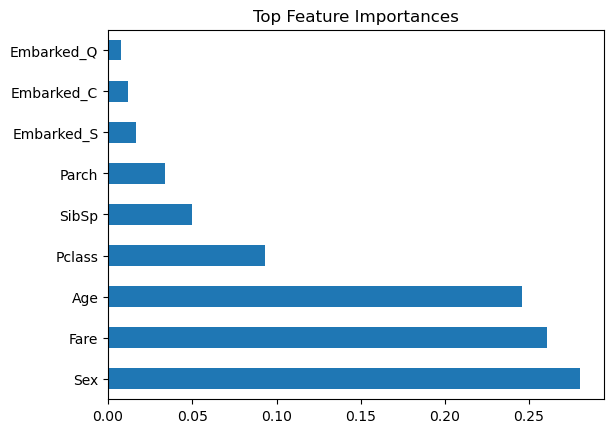

In [27]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()

## Predicting survival using the test set

In [28]:
## predicting using the test set

# n = int(input())
n = 66

single_test_row_df = X_test.iloc[[n]]

# Now predict using this DataFrame
predicted_class = rf_clf.predict(single_test_row_df)

# print(predicted_class) # This will still be an array, but it's correct

if predicted_class == 1:
    print(f"{titanic_df_test.loc[n,'Name']} is one of the Survivors")
else: print(f"{titanic_df_test.loc[n,'Name']} did not Survive")

Burns, Miss. Mary Delia is one of the Survivors


In [29]:
rf_pred = rf_predictions

X_pred = pd.concat([pd.DataFrame(X_test_dropna_), pd.DataFrame(rf_predictions)], axis=1)

X_pred = X_pred.rename(columns={0: 'Survived'})
X_pred = X_pred.dropna(subset=["Survived"])

X_pred["Survived (prediction)"] = X_pred['Survived'].map({1:True, 0:False}) 

X_pred = X_pred.drop("Survived", axis=1)


X_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived (prediction)
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,False
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,False
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,False
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,True
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,True
